In [3]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder


from sklearn import metrics

%matplotlib inline

# Load the Data

In [6]:
df = pd.read_csv(r"C:\Users\almal\Desktop\cleaned_dataset_A.csv")

In [8]:
df

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,Manchester United,Defender Centre-Back,186.000000,21.0,34,0.000000,0.000000,0.130529,0.0,0.000000,0.000000,0.000000,2758,47,13,0,2000000,2000000,2,0
1,Manchester United,midfield-CentralMidfield,181.000000,20.0,39,0.129125,0.064562,0.225968,0.0,0.000000,0.000000,0.000000,2788,0,0,1,800000,800000,3,0
2,Manchester United,midfield-CentralMidfield,175.000000,18.0,51,0.153759,0.102506,0.000000,0.0,0.000000,0.000000,0.000000,3512,0,0,1,800000,800000,3,0
3,Leicester City,Goalkeeper,191.000000,25.0,65,0.000000,0.000000,0.015340,0.0,0.000000,1.257883,0.291461,5867,0,0,0,2000000,2000000,1,0
4,Leicester City,Goalkeeper,189.000000,33.0,31,0.000000,0.000000,0.064516,0.0,0.000000,1.483871,0.161290,2790,89,14,0,600000,3500000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,Western Sydney Wanderers,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,0.0,0.000000,0.000000,0.000000,1023,0,0,0,75000,75000,4,1
5731,Western Sydney Wanderers,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,0.0,0.000000,0.000000,0.000000,1449,102,18,0,300000,300000,4,0
5732,Western Sydney Wanderers,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,0.0,0.000000,0.000000,0.000000,960,0,0,0,50000,50000,4,0
5733,Western Sydney Wanderers,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,0.0,0.104046,0.000000,0.000000,865,0,0,0,50000,50000,4,0


# Preprocess the Data

In [11]:
# Drop the 'position_encoded' column because there is another column with the same meaning
df.drop(['position_encoded'], axis=1, inplace=True)

# Keeping the original 'position' column intact for further encoding steps

In [13]:
df

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,winger
0,Manchester United,Defender Centre-Back,186.000000,21.0,34,0.000000,0.000000,0.130529,0.0,0.000000,0.000000,0.000000,2758,47,13,0,2000000,2000000,0
1,Manchester United,midfield-CentralMidfield,181.000000,20.0,39,0.129125,0.064562,0.225968,0.0,0.000000,0.000000,0.000000,2788,0,0,1,800000,800000,0
2,Manchester United,midfield-CentralMidfield,175.000000,18.0,51,0.153759,0.102506,0.000000,0.0,0.000000,0.000000,0.000000,3512,0,0,1,800000,800000,0
3,Leicester City,Goalkeeper,191.000000,25.0,65,0.000000,0.000000,0.015340,0.0,0.000000,1.257883,0.291461,5867,0,0,0,2000000,2000000,0
4,Leicester City,Goalkeeper,189.000000,33.0,31,0.000000,0.000000,0.064516,0.0,0.000000,1.483871,0.161290,2790,89,14,0,600000,3500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,Western Sydney Wanderers,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,0.0,0.000000,0.000000,0.000000,1023,0,0,0,75000,75000,1
5731,Western Sydney Wanderers,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,0.0,0.000000,0.000000,0.000000,1449,102,18,0,300000,300000,0
5732,Western Sydney Wanderers,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,0.0,0.000000,0.000000,0.000000,960,0,0,0,50000,50000,0
5733,Western Sydney Wanderers,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,0.0,0.104046,0.000000,0.000000,865,0,0,0,50000,50000,0


In [15]:
# Split all features into categorical and numeric
categorical_features = ['team','position']
numeric_features = ['height' , 'age','appearance','goals','assists','yellow cards','second yellow cards','red cards','goals conceded','clean sheets','minutes played','days_injured','games_injured',
                    'award','current_value','highest_value','winger']

In [17]:
# one hot encoding for categorical_features
df = pd.get_dummies(df, columns = categorical_features, drop_first=True)

In [19]:
df.shape

(5735, 387)

In [21]:
# Define a threshold for binary classification by using the median
threshold = df['current_value'].median()

# Function to categorize into binary classes: Low or High
def categorize_values_binary(value):
    if value <= threshold:
        return 'Low'
    else:
        return 'High'

# Apply the function to create a new binary classification column
df['current_value_category'] = df['current_value'].apply(categorize_values_binary)

# Drop the original 'current_value' column as it's no longer needed
df.drop('current_value', axis=1, inplace=True)

# Check the distribution of the new binary categories
print(df['current_value_category'].value_counts())

current_value_category
Low     3112
High    2623
Name: count, dtype: int64


In [23]:
encoder = LabelEncoder()
df['current_value_category_encoded'] = encoder.fit_transform(df['current_value_category']) 

In [25]:
df.drop('current_value_category', axis=1, inplace=True)

# Feature selection

In [28]:
correlation = df.corr(numeric_only=True)
print(correlation['current_value_category_encoded'].sort_values(ascending=False))

current_value_category_encoded    1.000000
position_Goalkeeper               0.165113
goals conceded                    0.115830
position_midfield                 0.091985
team_Richards Bay FC              0.062908
                                    ...   
games_injured                    -0.189400
assists                          -0.240275
minutes played                   -0.383475
appearance                       -0.390704
highest_value                    -0.628608
Name: current_value_category_encoded, Length: 387, dtype: float64


In [30]:
threshold = 0.10 

selected_features = correlation[abs(correlation['current_value_category_encoded']) > threshold]['current_value_category_encoded'].index
selected_features

Index(['appearance', 'goals', 'assists', 'goals conceded', 'minutes played',
       'days_injured', 'games_injured', 'award', 'highest_value',
       'position_Goalkeeper', 'current_value_category_encoded'],
      dtype='object')

In [32]:
selected_features = ['appearance', 'goals', 'assists', 'goals conceded', 'minutes played',
       'days_injured', 'games_injured', 'award', 'highest_value',
       'position_Goalkeeper', 'current_value_category_encoded']

In [34]:
df = df[selected_features]
df.head()

,appearance,goals,assists,goals conceded,minutes played,days_injured,games_injured,award,highest_value,position_Goalkeeper,current_value_category_encoded
0,34,0.000000,0.000000,0.000000,2758,47,13,0,2000000,False,0
1,39,0.129125,0.064562,0.000000,2788,0,0,1,800000,False,0
2,51,0.153759,0.102506,0.000000,3512,0,0,1,800000,False,0
3,65,0.000000,0.000000,1.257883,5867,0,0,0,2000000,True,0
4,31,0.000000,0.000000,1.483871,2790,89,14,0,3500000,True,0


In [36]:
# Prepare data
X = df.drop(['current_value_category_encoded'], axis=1)


# sacle the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Build the Model

In [39]:
wcss = []
for i in range(1, 20):  # Test 1 to 10 clusters
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS

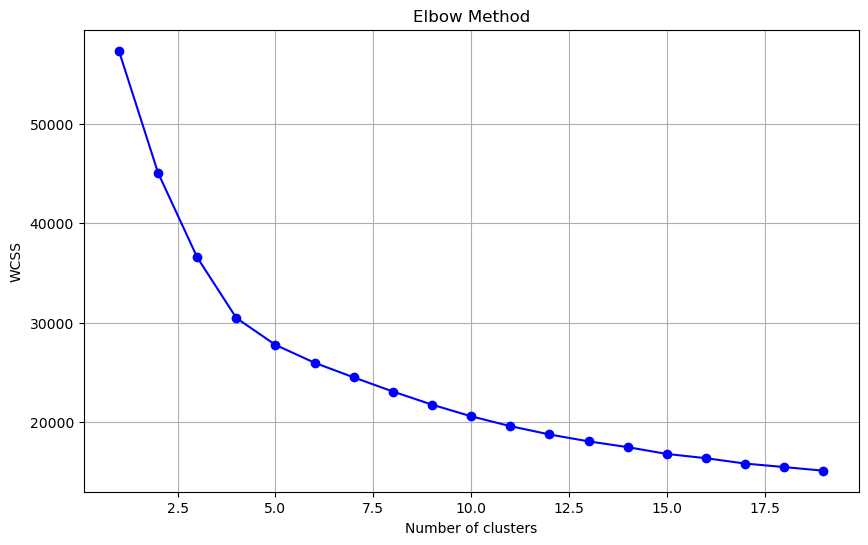

In [42]:
# 3. Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), wcss,  marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [44]:
# Optional: Apply k-Means using the optimal number of clusters
optimal_clusters = 5 # This might change based on your actual elbow curve analysis
model = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Train and test the model

In [48]:
# Fit the model on the training data
y_pred = model.fit_predict(X_scaled)

# Evaluating the Model 

In [51]:
X.head(5)

,appearance,goals,assists,goals conceded,minutes played,days_injured,games_injured,award,highest_value,position_Goalkeeper
0,34,0.000000,0.000000,0.000000,2758,47,13,0,2000000,False
1,39,0.129125,0.064562,0.000000,2788,0,0,1,800000,False
2,51,0.153759,0.102506,0.000000,3512,0,0,1,800000,False
3,65,0.000000,0.000000,1.257883,5867,0,0,0,2000000,True
4,31,0.000000,0.000000,1.483871,2790,89,14,0,3500000,True


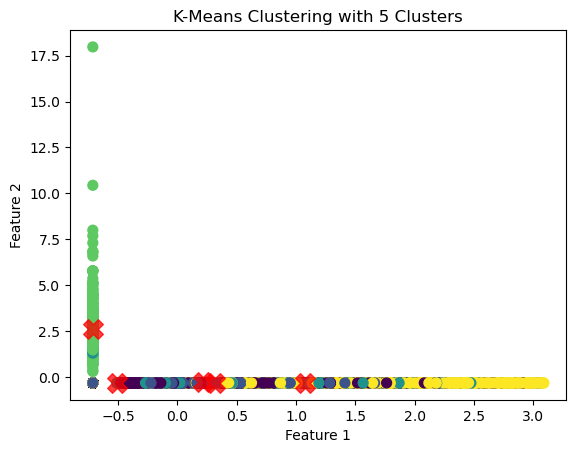

In [53]:
# Plotting the clusters with optimal number
plt.scatter(X_scaled[:, 2], X_scaled[:, 3], c=y_pred, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 3], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'K-Means Clustering with {optimal_clusters} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [55]:
X['kmeans'] = y_pred

In [57]:
X['kmeans'].value_counts()

kmeans
1    2183
0    1240
4     920
2     788
3     604
Name: count, dtype: int64

In [59]:
X[X['kmeans']==0]

,appearance,goals,assists,goals conceded,minutes played,days_injured,games_injured,award,highest_value,position_Goalkeeper,kmeans
0,34,0.000000,0.000000,0.0,2758,47,13,0,2000000,False,0
7,47,0.051326,0.000000,0.0,3507,0,0,0,2500000,False,0
12,47,0.025997,0.025997,0.0,3462,0,0,0,5000000,False,0
15,69,0.104026,0.156039,0.0,5191,12,3,1,3500000,False,0
21,56,0.058454,0.038969,0.0,4619,0,0,0,4000000,False,0
...,...,...,...,...,...,...,...,...,...,...,...
5699,43,0.086761,0.057841,0.0,3112,0,0,2,350000,False,0
5702,58,0.131359,0.075063,0.0,4796,0,0,2,450000,False,0
5706,52,0.090000,0.090000,0.0,3000,0,0,2,600000,False,0
5718,47,0.045068,0.022534,0.0,3994,27,5,0,1000000,False,0


<Axes: xlabel='appearance', ylabel='goals'>

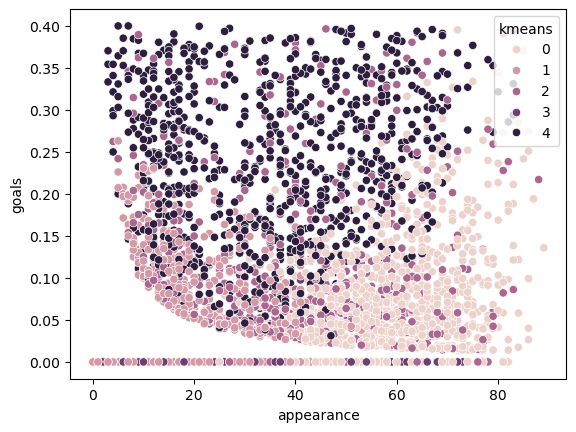

In [63]:
sns.scatterplot(data = X , x = 'appearance', y = 'goals', hue = 'kmeans')